In [1]:
import os,glob
import numpy as np
from scipy import spatial
from IPython.display import Image,display
index,files,start = [],{},0
for fname in glob.glob("index/*.npy"):
    index.append(np.load(fname))
    for f in file(fname.replace(".feats_pool3.npy",".files")):
        files[start] = f.strip()
        start += 1        
index = np.concatenate(index)
print "Files ",len(files),"Index ",index.shape

Files  100428 Index  (100428, 2048)


In [2]:
def download(filename,query,rank):
    try:
        os.mkdir("examples")
    except:
        pass    
    try:
        os.mkdir("examples/{}".format(query))
    except:
        pass    
    os.system("aws s3 cp s3://aub3data/dataset/{} examples/{}/{}.jpg".format(filename.split("/")[-1],query,rank))

Total Results:  (100428,)
Query	Distance	0.0	Filename:	/mnt/dataset/andreea_diaconu_6520168.jpg


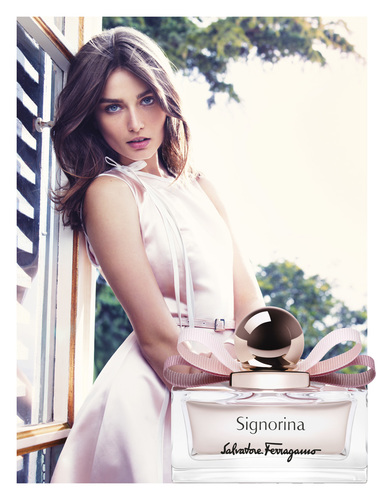

1	Distance	16.08	Filename:	/mnt/dataset/bianca_balti_4509129.jpg


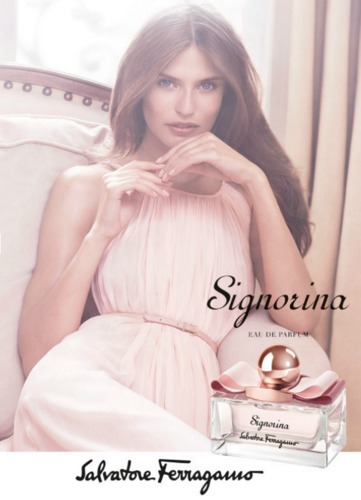

2	Distance	16.26	Filename:	/mnt/dataset/angela_lindvall_1445241.jpg


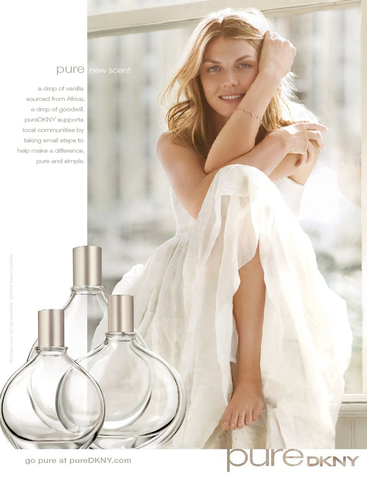

3	Distance	16.72	Filename:	/mnt/dataset/candice_swanepoel_7431159.jpg


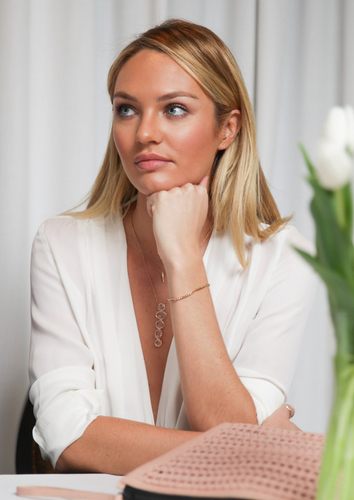

4	Distance	16.73	Filename:	/mnt/dataset/candice_swanepoel_1845865.jpg


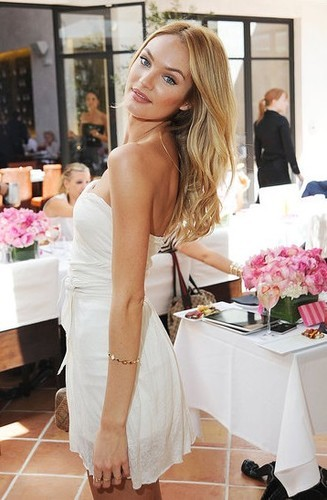

In [12]:
query = 98165 #98165
query_vector = index[query]
dist = spatial.distance.cdist(query_vector[np.newaxis,:],index)
ranked = np.squeeze(dist.argsort())
print "Total Results: ",ranked.shape
for i,k in enumerate(ranked[:5]):
    print "{}\tDistance\t{}\tFilename:\t{}".format(i if i else "Query",round(dist[0,k],2),files[k])
    download(files[k],query,i)
    display(Image(filename="examples/{}/{}.jpg".format(query,i)))